In [25]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

df = pd.read_excel('./data4/시도별 전출입 인구수.xlsx', fillna=0, header=0)
df = df.fillna(method='ffill')

mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시')

df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

col_years = list(map(str, range(1970, 2018)))
df = df_seoul.loc[['충청남도', '경상북도', '강원도', '부산광역시'], col_years]

print(type(df))

df.head()

<class 'pandas.core.frame.DataFrame'>


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
충청남도,15954,18943,23406,27139,25509,51205,41447,43993,48091,45388,...,27458,24889,24522,24723,22269,21486,21473,22299,21741,21020
경상북도,11868,16459,22073,27531,26902,46177,40376,41155,42940,43565,...,15425,16569,16042,15818,15191,14420,14456,15113,14236,12464
강원도,9352,12885,13561,16481,15479,27837,25927,25415,26700,27599,...,23668,23331,22736,23624,22332,20601,21173,22659,21590,21016
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484


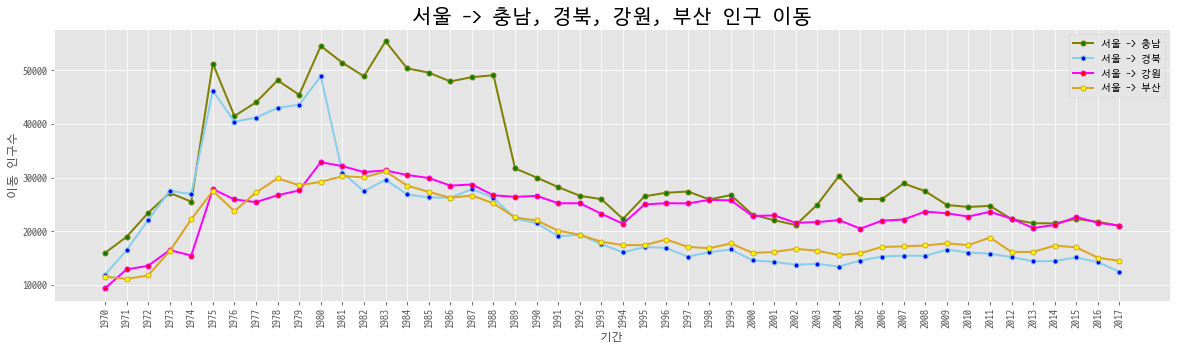

In [48]:
plt.style.use('ggplot')

# 마이너스 폰트 깨짐 현상 수정
mpl.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
path = '/usr/share/fonts/truetype/naver-d2coding/D2Coding-Ver1.3.2-20180524-all.ttc'
font_name = fm.FontProperties(fname=path, size=15).get_name()
plt.rc('font', family=font_name)

fig = plt.figure(figsize=(20, 5))

ax = fig.add_subplot(1, 1, 1)
ax.plot(col_years, df.loc['충청남도', :], marker='o', markerfacecolor='green', markersize=5, color='olive', linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df.loc['경상북도', :], marker='o', markerfacecolor='blue', markersize=5, color='skyblue', linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df.loc['강원도', :], marker='o', markerfacecolor='red', markersize=5, color='magenta', linewidth=2, label='서울 -> 강원')
ax.plot(col_years, df.loc['부산광역시', :], marker='o', markerfacecolor='yellow', markersize=5, color='goldenrod', linewidth=2, label='서울 -> 부산')

# print(df.loc['부산광역시', :])

ax.legend(loc='best')
ax.set_title('서울 -> 충남, 경북, 강원, 부산 인구 이동', size=20)
ax.set_xlabel('기간', size=12)
ax.set_ylabel('이동 인구수', size=12)
ax.set_xticklabels(col_years, rotation=90)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.show()